In [ ]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
!unzip data.zip

In [3]:
#@ IMPORTING LIBRARIES:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


#@ INSPECTION:
import tensorflow
tensorflow.__version__

'2.14.0'

## Q.1

In [7]:
#@ INITIALIZING PATH TO DATASET:
train_dir = './data/train'
test_dir = './data/test'


#@ INITIALIZING MODEL CREATION:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#@ COMPILING THE MODEL:
model.compile(loss='binary_crossentropy', #Q1. Loss = binary_crossentropy
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
             metrics=['acc'])

## Q.2

In [8]:
# Q.2 Number of convolution layer parameters = 896
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

## Q.3 and Q.4

In [9]:
#@ INITIALIZING IMAGE DATAGENERATOR:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


#@ TRAINING DATAGENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    shuffle=True
                                                    )

Found 3677 images belonging to 2 classes.


In [10]:
#@ VALIDATION DATAGENERATOR:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        shuffle=True)

Found 918 images belonging to 2 classes.


In [11]:
#@ INSPECTING:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:

#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)


Epoch 1/10
184/184 [==============================] - 110s 595ms/step - loss: 0.6804 - acc: 0.5578 - val_loss: 0.6386 - val_acc: 0.6057
Epoch 2/10
184/184 [==============================] - 96s 519ms/step - loss: 0.6425 - acc: 0.6165 - val_loss: 0.6017 - val_acc: 0.6590
Epoch 3/10
184/184 [==============================] - 110s 601ms/step - loss: 0.6061 - acc: 0.6647 - val_loss: 0.5664 - val_acc: 0.6928
Epoch 4/10
184/184 [==============================] - 103s 558ms/step - loss: 0.5656 - acc: 0.7044 - val_loss: 0.5448 - val_acc: 0.7277
Epoch 5/10
184/184 [==============================] - 96s 521ms/step - loss: 0.5266 - acc: 0.7460 - val_loss: 0.5255 - val_acc: 0.7636
Epoch 6/10
184/184 [==============================] - 95s 514ms/step - loss: 0.4918 - acc: 0.7694 - val_loss: 0.5364 - val_acc: 0.7353
Epoch 7/10
184/184 [==============================] - 91s 495ms/step - loss: 0.4820 - acc: 0.7805 - val_loss: 0.5011 - val_acc: 0.7745
Epoch 8/10
184/184 [==============================] 

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

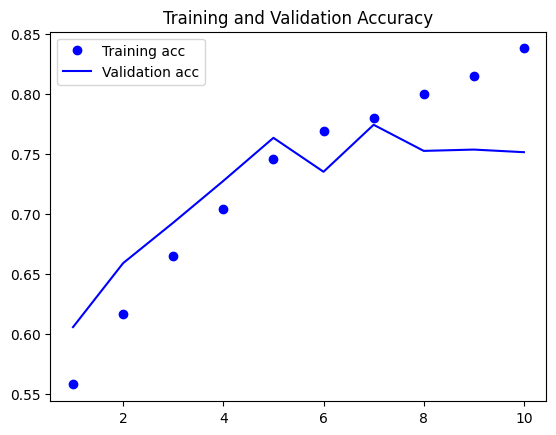

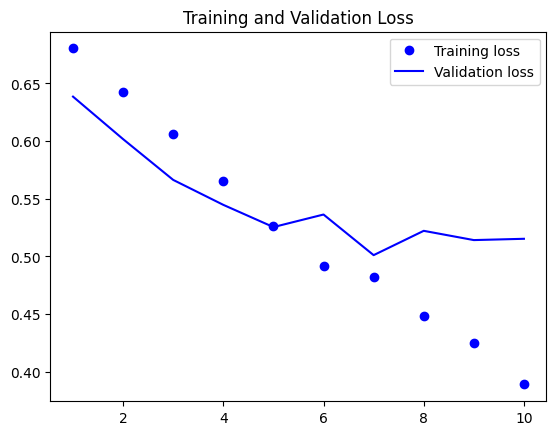

In [16]:
#@ PLOTTING LOSS AND ACCURACY:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Q.3

In [14]:
# Q.3
#@ MEDIAN OF ACCURACY:
acc_median = np.median(acc)
acc_median

0.7576829195022583

### Q.4

In [15]:
# Q.4
#@ STANDARD DEVIATION OF LOSS:
loss_std = np.std(loss)
loss_std

0.09143169150429191

## Q.5 and Q.6

In [17]:
#@ TRAINING DATA GENERATOR:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True)


#@ TEST DATA GENERATOR:
test_datagen = ImageDataGenerator(rescale=1./255)


#@ INITIALIZING DATA GENERATOR:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')


Found 3677 images belonging to 2 classes.


In [18]:
#@ INITIALIZING DATA GENERATOR:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 918 images belonging to 2 classes.


In [19]:
#@ MODEL TRAINING WITH AUGMENTATION:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
115/115 [==============================] - 104s 902ms/step - loss: 0.5006 - acc: 0.7550 - val_loss: 0.4736 - val_acc: 0.7843
Epoch 2/10
115/115 [==============================] - 103s 895ms/step - loss: 0.4938 - acc: 0.7686 - val_loss: 0.4695 - val_acc: 0.7734
Epoch 3/10
115/115 [==============================] - 106s 921ms/step - loss: 0.4796 - acc: 0.7743 - val_loss: 0.4620 - val_acc: 0.7843
Epoch 4/10
115/115 [==============================] - 106s 920ms/step - loss: 0.4717 - acc: 0.7770 - val_loss: 0.4749 - val_acc: 0.7800
Epoch 5/10
115/115 [==============================] - 111s 968ms/step - loss: 0.4763 - acc: 0.7726 - val_loss: 0.4659 - val_acc: 0.7865
Epoch 6/10
115/115 [==============================] - 110s 954ms/step - loss: 0.4624 - acc: 0.7830 - val_loss: 0.4654 - val_acc: 0.7778
Epoch 7/10
115/115 [==============================] - 118s 1s/step - loss: 0.4601 - acc: 0.7887 - val_loss: 0.4853 - val_acc: 0.7756
Epoch 8/10
115/115 [==============================]

In [21]:
#@ INSPECTION ACCURACY AND LOSS:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']



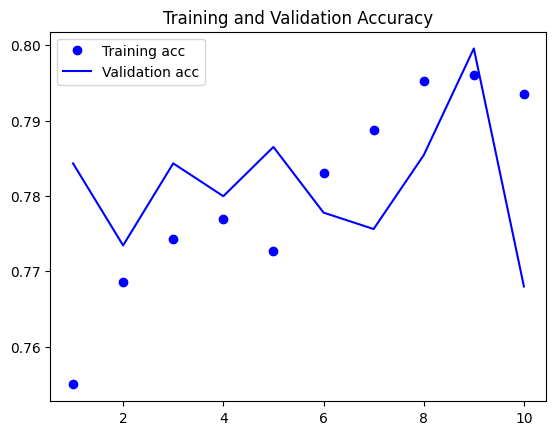

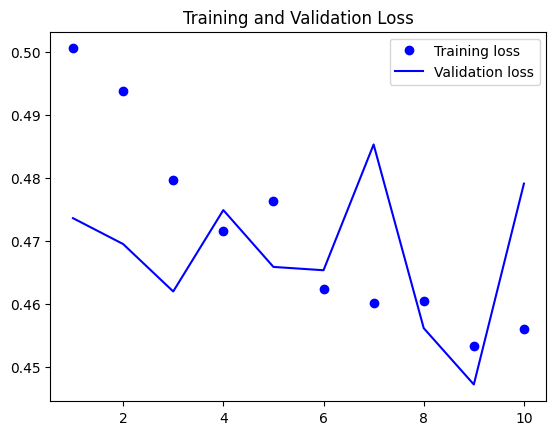

In [25]:
#@ PLOTTING LOSS AND ACCURACY:
epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Q.5

In [22]:
# Q.5
#@ MEAN OF VALIDATION LOSS:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.46792256236076357

In [23]:
#@ INSPECTION:
val_acc_aug[5:10]

[0.7777777910232544,
 0.7755991220474243,
 0.7854030728340149,
 0.7995642423629761,
 0.7679738402366638]

### Q.6

In [24]:
# Q.6
#@ MEAN OF ACCURACY:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7812636137008667